# Introduction

What is the risk of a client not paying its credit card invoince in the next month?

The clients will have 3 classificatons: High risk, average risk and low risk.

One can also predict the behavior of the client using credit card.

The dataset used will be https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

# Pre-Processing data

In [70]:
import pandas as pd
data = pd.read_csv('CC GENERAL.csv')
data.drop(columns=['CUST_ID','TENURE'], inplace=True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [71]:
nans = data.isna().sum()
nans

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [72]:
data.fillna(data.median(), inplace=True)
nans = data.isna().sum()
nans

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

# Normalization

In [73]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(data.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

# Using Kmeans

In [74]:
from sklearn.cluster import KMeans

In [75]:
kmn = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmn.fit_transform(values)

## Validation and explanation

Checking the silhoute coeficient or how compact is the clusterization.

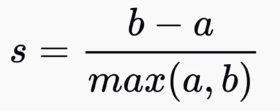

To use silhoute one must calculate the mean of euclidean distances between the points of the same cluster to obtain a.

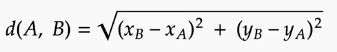

To obtain b, one must calculate the mean of the other clusters, but will use only the closest cluster points or the lowest value to be b.



In [76]:
from sklearn import metrics
labels = kmn.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.3645635430091902

The value obtained is considered good, since it is above zero. This coeficient have a minumum value of -1 and a maximum value of 1. The closest to 1 the more separated the clusters will be.

## Using Davies-Bouldin (DB) index

The Davies-Bouldin index is a clustering validation measure that is used to evaluate the quality of clustering algorithms. It provides a quantitative assessment of the separation between clusters and the similarity within clusters.

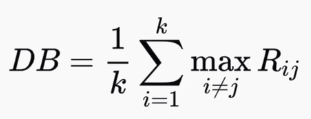


R is a similarity number that will define how equal a cluster i is about j.

s is based on the center of the a cluster i (si), which is a virtual point called centroid. The centroid is calculated based on the mean of all the euclidean distances from x-axis and y-axis, based on the points inside that cluster. s is determined for each cluster.

d is the euclidean distance between each cluster's centroid.


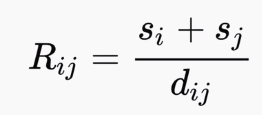

Using the worst values of R (highest value) makes a good evaluation, since if the worst cluster has that value the others will always be better. For DB, values closer to zero are the  best.

In [77]:
from sklearn import metrics
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0748719314525408

## Calinski-Harabasz index

The Calinski-Harabasz index, also known as the Variance Ratio Criterion, is another clustering validation measure that is used to evaluate the quality of clustering results. This index is based on the idea that a good clustering solution should have high inter-cluster variance (between-cluster dispersion) and low intra-cluster variance (within-cluster dispersion). In other words, clusters should be well-separated from each other while maintaining tight and compact internal structures.

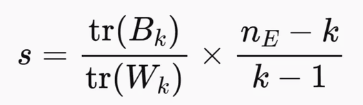

k = total number of clusters

ne = Number of elements inside a cluster

wk = Dispersion of elements within a cluster

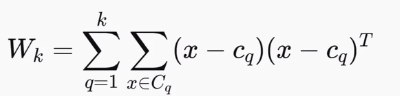

Wk is a sum based on the matrix of covariance estimative.

Bk = Dispersion of elements between clusters
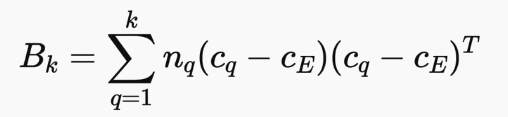

nq= Numer of elements in the cluster
cq= cluster's centroid
ce= element's centroid




In [78]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.563803699364

## Relative validation

There is no other way to compare those scores. So it is necessary to create new clusters and new scores to obtain the best validation condition.

In [79]:
def clust_algo(n_clusters, dataset):
  kmn = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
  labels = kmn.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  cal_har = metrics.calinski_harabasz_score(dataset,labels)
  return s, dbs, cal_har


In [80]:
s1, dbs1, cal_har1 = clust_algo(3, values)
s2, dbs2, cal_har2 = clust_algo(5, values)
s3, dbs3, cal_har3 = clust_algo(10, values)
s4, dbs4, cal_har4 = clust_algo(20, values)
s5, dbs5, cal_har5 = clust_algo(50, values)
print(f'n_clusters=3 Silhouette={s1:.2f}, Davies-Bouldin={dbs1:.2f}, Calinski Harabasz={cal_har1:.2f}\n'
f'n_clusters=5 Silhouette={s2:.2f}, Davies-Bouldin={dbs2:.2f}, Calinski Harabasz={cal_har2:.2f}\n'
f'n_clusters=10 Silhouette={s3:.2f}, Davies-Bouldin={dbs3:.2f}, Calinski Harabasz={cal_har3:.2f}\n'
f'n_clusters=20 Silhouette={s4:.2f}, Davies-Bouldin={dbs4:.2f}, Calinski Harabasz={cal_har4:.2f}\n'
f'n_clusters=50 Silhouette={s5:.2f}, Davies-Bouldin={dbs5:.2f}, Calinski Harabasz={cal_har5:.2f}\n')

n_clusters=3 Silhouette=0.33, Davies-Bouldin=1.31, Calinski Harabasz=3526.44
n_clusters=5 Silhouette=0.36, Davies-Bouldin=1.08, Calinski Harabasz=3431.78
n_clusters=10 Silhouette=0.35, Davies-Bouldin=1.11, Calinski Harabasz=3019.11
n_clusters=20 Silhouette=0.28, Davies-Bouldin=1.22, Calinski Harabasz=2390.14
n_clusters=50 Silhouette=0.24, Davies-Bouldin=1.22, Calinski Harabasz=1608.88



Based on the n_clusters=5 parameter, 5 groups of clients will be clustered, since this will better explain the client's behavior in a less cardinal portion. Also, the best values of the validation were between 3 and 5.

Now one can use another way to validate this decision, by using a random dataset for comparison.

## Generating a random dataset

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [82]:
import numpy as np

In [83]:
rng_data = np.random.rand(8950,16)
s, dbs, cal_har = clust_algo(5, rng_data)
print(f'Selected n_clusters=5 Silhouette={s2:.2f}, Davies-Bouldin={dbs2:.2f}, Calinski Harabasz={cal_har2:.2f}\n'
    f'rng_data n_clusters=5 Silhouette={s:.2f}, Davies-Bouldin={dbs:.2f}, Calinski Harabasz={cal_har:.2f}')

Selected n_clusters=5 Silhouette=0.36, Davies-Bouldin=1.08, Calinski Harabasz=3431.78
rng_data n_clusters=5 Silhouette=0.04, Davies-Bouldin=3.57, Calinski Harabasz=302.47


Here one can assume that rng_data had a big difference between the dataset. Values of s and cal_har were higher for the dataset, while dbs had lower values if comparing the dataset with rng_data respectively. This result confirms the validation of n_clusters=5 having a better separation of the data.

## Cluster stability validation

In [84]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, cal_har1 = clust_algo(5, set1)
s2, dbs2, cal_har2 = clust_algo(5, set2)
s3, dbs3, cal_har3 = clust_algo(5, set3)

print(f'n_clusters=3 Silhouette={s1:.2f}, Davies-Bouldin={dbs1:.2f}, Calinski Harabasz={cal_har1:.2f}\n'
f'n_clusters=5 Silhouette={s2:.2f}, Davies-Bouldin={dbs2:.2f}, Calinski Harabasz={cal_har2:.2f}\n'
f'n_clusters=10 Silhouette={s3:.2f}, Davies-Bouldin={dbs3:.2f}, Calinski Harabasz={cal_har3:.2f}\n')


n_clusters=3 Silhouette=0.37, Davies-Bouldin=1.06, Calinski Harabasz=1204.11
n_clusters=5 Silhouette=0.35, Davies-Bouldin=1.14, Calinski Harabasz=1194.95
n_clusters=10 Silhouette=0.37, Davies-Bouldin=1.10, Calinski Harabasz=1167.51



Those sets of separated data that were clustered and tested, tell one that they have almost the same values. This means that the cluster stability is good and validated.

## Cluster interpretation

In [85]:
data['cluster']= labels
data.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1546.0  1141.897935  1661.843122   0.000000   211.969616   
1        2643.0  3044.136810  2482.112440   6.824905  1261.851516   
2        1081.0  1800.909055  1979.686042   0.000000   509.872908   
3        3282.0   445.348234   847.853452   0.000000    23.392341   
4         398.0  1966.347536  1837.856615  70.794108  1010.501276   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         555.745265  1371.943854  19043.138560            1546.0  0.927273   
1        2173.970603  4241.157156  18495.558550            2643.0  0.964904   
2        1100.941072  2321.846501  14581.459140            1081.0  0.862756   
3          83.203408   413.489525   9630.367575            3282.0  0.774360   
4        1319.413416  2127.881172  11670.179850             398.0  0.989143   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       525.358701  18621.013310           1546.0  0.277813   
1        ...      1331.738882   8345.641905           2643.0  0.001772   
2        ...       886.322345  21235.065300           1081.0  0.115960   
3        ...       249.249987   4483.503862           3282.0  0.246249   
4        ...      7316.774661  76406.207520            398.0  0.020159   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.366762  0.0  0.0  0.083333  0.545455  1.0  
1        0.023232  0.0  0.0  0.000000  0.000000  0.6  
2        0.186377  0.0  0.0  0.083333  0.142857  1.0  
3        0.346497  0.0  0.0  0.000000  0.444444  1.0  
4        0.092358  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [86]:
centroids = kmn.cluster_centers_
centroids

array([[1.59944767e-01, 2.45345727e-04, 4.37529692e-01, 2.56150524e-01,
        1.81549571e-01, 2.61413545e-02, 2.04673627e-04, 8.87261791e-05,
        1.51042738e-04, 9.41920561e-06, 1.73139274e-04, 6.16594657e-03,
        6.03452310e-01, 4.03757423e-01, 8.57257696e-02, 7.24355202e-05],
       [5.06043862e-01, 2.73226520e-04, 6.26577318e-02, 3.68504950e-02,
        2.58289910e-02, 2.49873249e-01, 6.84893110e-05, 2.62662030e-05,
        4.57093105e-05, 5.70157569e-05, 1.14511021e-03, 1.35321690e-03,
        7.18651448e-01, 1.66368493e-01, 1.80801699e-01, 5.33402138e-07],
       [2.36780148e-01, 2.17066137e-04, 5.87704098e-02, 3.34033982e-02,
        2.53721875e-02, 4.04426109e-01, 5.16628255e-05, 2.01593750e-05,
        3.43648457e-05, 6.61712090e-05, 1.58861012e-03, 1.09514832e-03,
        5.37512996e-01, 5.92345688e-01, 1.04915260e-01, 2.74318680e-05],
       [6.93093532e-02, 2.30451275e-04, 1.21142872e-01, 4.79899933e-02,
        7.32531074e-02, 2.47454873e-02, 1.72378171e-04, 3.367

list[n] represents a list of  5 clusters and the values of list[n][n] represent a single cluster and list [n][n][n] represents a feature of the data on that cluster.

In [87]:
max = len(centroids[0])
for i in range(max):
  print(data.columns.values[i],'\n{:.4f}'.format(centroids[:,i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0228
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0367
PAYMENTS 
0.0274
MINIMUM_PAYMENTS 
0.0559
PRC_FULL_PAYMENT 
0.0000


Considering the highest variance values one can infer that:

BALANCE 0.0224

PURCHASES 0.0197

CASH_ADVANCE 0.0226

CREDIT_LIMIT 0.0361

PAYMENTS 0.0280

have the highest variance and will be selected for further analysis.

In [88]:
descr = data.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT','PAYMENTS']
n_clients = descr.size()
descr = descr.mean()
descr['n_clients'] = n_clients
descr

<ipython-input-88-191ec6f72f9d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  descr = data.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT','PAYMENTS']


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1141.897935,3262.872387,183.597762,4088.331275,3041.324095,1546
1,3044.136810,388.990988,1621.238206,4488.289822,967.935661,2643
2,1800.909055,466.019473,3287.022132,3987.068651,4667.483007,1081
3,445.348234,628.734909,143.912402,5134.002671,814.150752,3282
4,1966.347536,851.518467,418.417864,2213.316583,1341.468777,398


In [89]:
def get_highest_value_indexes(df):
    for column in df.columns:
        max_value = df[column].max()
        max_index = df[column].idxmax()
        yield max_index, column
def get_lowest_value_indexes(df):
    for column in df.columns:
        min_value = df[column].min()
        min_index = df[column].idxmin()
        yield min_index, column

for index, column in get_highest_value_indexes(descr):
    print(f"The highest values of {column} are in the Cluster {index} clients data")
print('\n')
for index, column in get_lowest_value_indexes(descr):
   print(f"The lowest values of {column} are in the Cluster {index} clients data")


The highest values of BALANCE are in the Cluster 1 clients data
The highest values of PURCHASES are in the Cluster 0 clients data
The highest values of CASH_ADVANCE are in the Cluster 2 clients data
The highest values of CREDIT_LIMIT are in the Cluster 3 clients data
The highest values of PAYMENTS are in the Cluster 2 clients data
The highest values of n_clients are in the Cluster 3 clients data


The lowest values of BALANCE are in the Cluster 3 clients data
The lowest values of PURCHASES are in the Cluster 1 clients data
The lowest values of CASH_ADVANCE are in the Cluster 3 clients data
The lowest values of CREDIT_LIMIT are in the Cluster 4 clients data
The lowest values of PAYMENTS are in the Cluster 3 clients data
The lowest values of n_clients are in the Cluster 4 clients data


in cluster 0 the clients do not spend that much money, but also have the highest credit limit. in Cluster 1 the clients spend more money and also require more cash advance. Clients in cluster 2 spend more money buying
 adn clients in cluster 3 with cash advance, so they have the smallest limit. The quantity of clients in cluster 4 are the lowest and those clients pay more than the others, so this could tell that they are the the "good clients". or not?

In [91]:
data.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1546.0,0.277813,0.366762,0.0,0.0,0.083333,0.545455,1.0
1,2643.0,0.001772,0.023232,0.0,0.0,0.000000,0.000000,0.6
2,1081.0,0.115960,0.186377,0.0,0.0,0.083333,0.142857,1.0
3,3282.0,0.246249,0.346497,0.0,0.0,0.000000,0.444444,1.0
4,398.0,0.020159,0.092358,0.0,0.0,0.000000,0.000000,1.0


This feature can be used to tell if the clients of certain cluster are paying more from their credit card bill, based on the percentage of the total debt. This tells us that clients from cluster 0 and 3 are the best payers, not clients from cluster 4 and 1, those are the worst paying clients.


# Classification of the clients for the company

Considering all characteristics of the clustered clients above and their classification and behavior, based on their credit card invoices.

The company decided to create a system of point rewards to increase the income the company. The focus will be based on clients in group 0 since it has the greatest amount of clients, credit limit, and are good payers. This could make them spend more and pay more, increasing the company's income.